In [4]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import libraries here:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Project b: Clustering Mobility Data

In [6]:
df= pd.read_csv(r'D2.csv')
df['date']=pd.to_datetime(df['date'])
df=df[df.grocery_and_pharmacy.notnull()]
df.drop('date', axis=1, inplace=True)
df=df.fillna(df.mean())
convert_dict = {'retail': int, 'retail': int,'grocery_and_pharmacy': int,'parks': int,'transit_stations': int,'residential': int } 
  
df = df.astype(convert_dict) 

In [7]:
df2=df
df2=df2.drop(['region','country'], axis=1)

#### Understand data quality 

In [8]:
df2

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,-63,-32,-74,-79,-55,34
1,-54,-23,-66,-75,-47,28
2,-49,-26,-83,-50,-46,29
3,-76,-42,-78,-81,-64,41
4,-46,-22,-43,-56,-30,21
...,...,...,...,...,...,...
1125,-67,-38,-19,-53,-64,32
1126,-63,-33,-23,-72,-59,29
1127,-75,-42,-75,-84,-75,37
1128,-18,-10,-6,-23,-19,12


In [9]:
#Identifying outliers
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return len(outliers)
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        a=detect_outlier(df[col])
        print(df[col].name+ " : " +str(a) + ' outliers')
        outliers.clear()

retail : 0 outliers
grocery_and_pharmacy : 1 outliers
parks : 9 outliers
transit_stations : 3 outliers
workplaces : 3 outliers
residential : 1 outliers


In [11]:
#Remove outliers
from scipy import stats
idx = np.all(stats.zscore(df2)<3, axis=1) & np.all(stats.zscore(df2)>-3, axis=1)
dfr_cleaned = df2.loc[idx]
print("Before transformation: %d", df2.shape)
print("After removing outliers: %d", dfr_cleaned.shape)

Before transformation: %d (942, 6)
After removing outliers: %d (926, 6)


In [12]:
dfr_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 0 to 1129
Data columns (total 6 columns):
retail                  926 non-null int32
grocery_and_pharmacy    926 non-null int32
parks                   926 non-null int32
transit_stations        926 non-null int32
workplaces              926 non-null int64
residential             926 non-null int32
dtypes: int32(5), int64(1)
memory usage: 32.6 KB


### Task 2: Build a clustering model to profile the categories of locations visited by the people

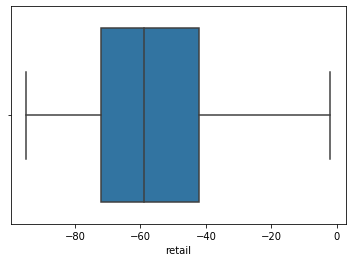

In [13]:
ax = sns.boxplot(x=dfr_cleaned["retail"], data=df2)

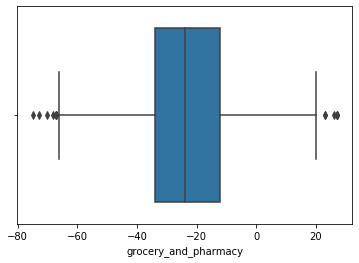

In [14]:
ax = sns.boxplot(x=dfr_cleaned["grocery_and_pharmacy"], data=dfr_cleaned)

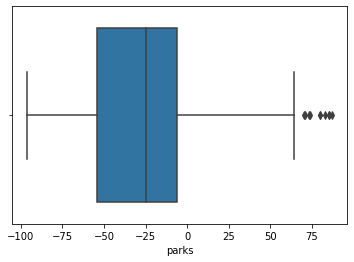

In [15]:
ax = sns.boxplot(x=dfr_cleaned["parks"], data=df2)

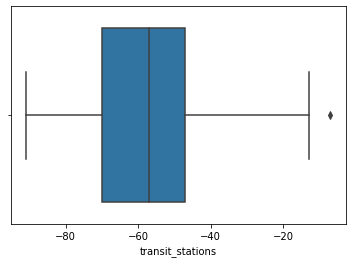

In [16]:
ax = sns.boxplot(x=dfr_cleaned["transit_stations"], data=dfr_cleaned)

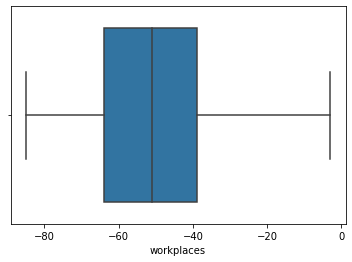

In [17]:
ax = sns.boxplot(x=dfr_cleaned["workplaces"], data=dfr_cleaned)

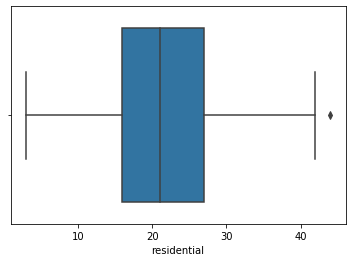

In [18]:
ax = sns.boxplot(x=dfr_cleaned["residential"], data=dfr_cleaned)

In [19]:


# take 3 variables and drop the rest

# convert df2 to matrix
X = dfr_cleaned.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X

array([[-0.34420497, -0.45340254, -1.31944428, -1.33218359, -0.32176765,
         1.65181106],
       [ 0.10570159,  0.05777938, -1.09746433, -1.08542618,  0.15678179,
         0.86526133],
       [ 0.35564968, -0.11261459, -1.56917173,  0.45680767,  0.21660047,
         0.99635295],
       ...,
       [-0.94408039, -1.02138246, -1.34719177, -1.64063036, -1.51814124,
         2.04508592],
       [ 1.90532784,  0.79615327,  0.56738531,  2.12242021,  1.83170481,
        -1.23220462],
       [-0.29421535, -1.47576639, -0.59800944, -1.20880488, -0.86013576,
         2.70054403]])

In [21]:

# list to save the clusters and cost
clusters = []
inertia_vals = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    model.fit(X)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

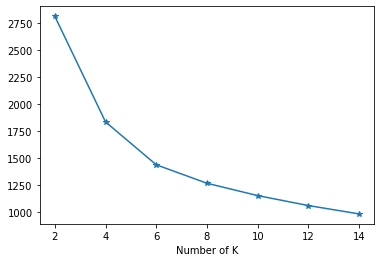

In [22]:

# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.xlabel('Number of K')
plt.show()

You can see that 4,6 and 8 can be seen as the clusters. We need to test them out 

In [24]:
from sklearn.metrics import silhouette_score

print(clusters[1])
print("Silhouette score for k=4", silhouette_score(X, clusters[1].predict(X)))

print(clusters[2])
print("Silhouette score for k=6", silhouette_score(X, clusters[2].predict(X)))

print(clusters[3])
print("Silhouette score for k=8", silhouette_score(X, clusters[3].predict(X)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.27233756022932193
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.27016117094287884
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.22563835712064786


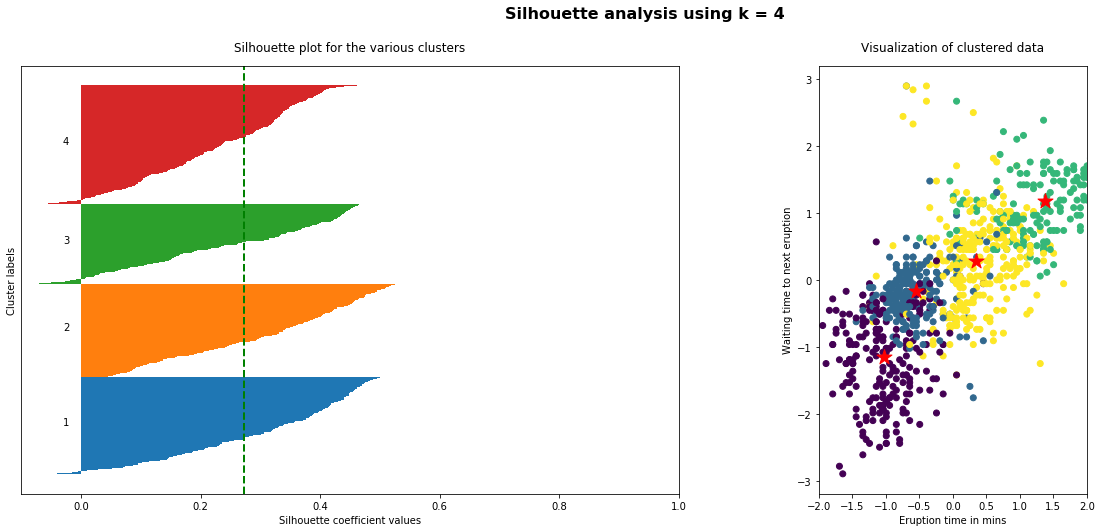

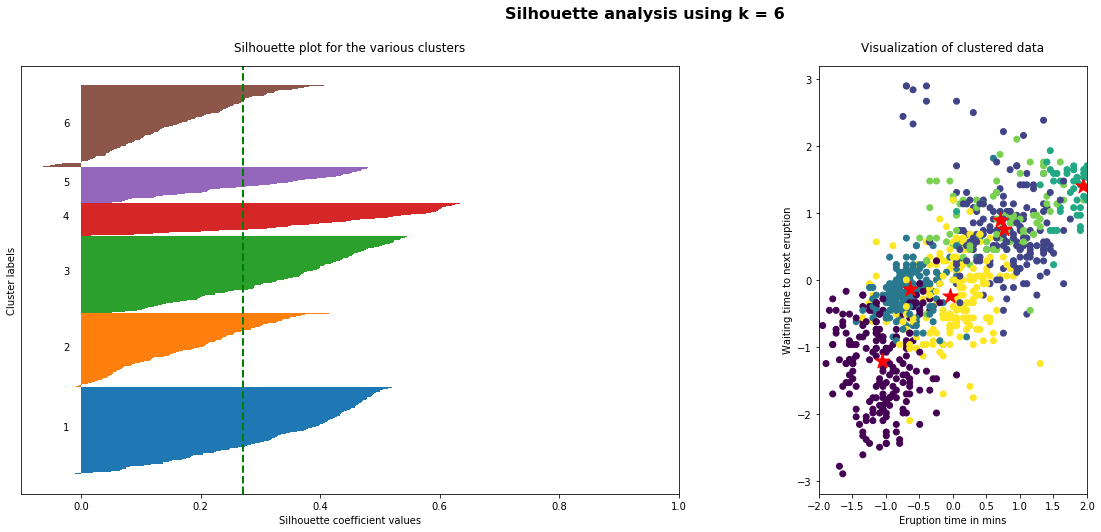

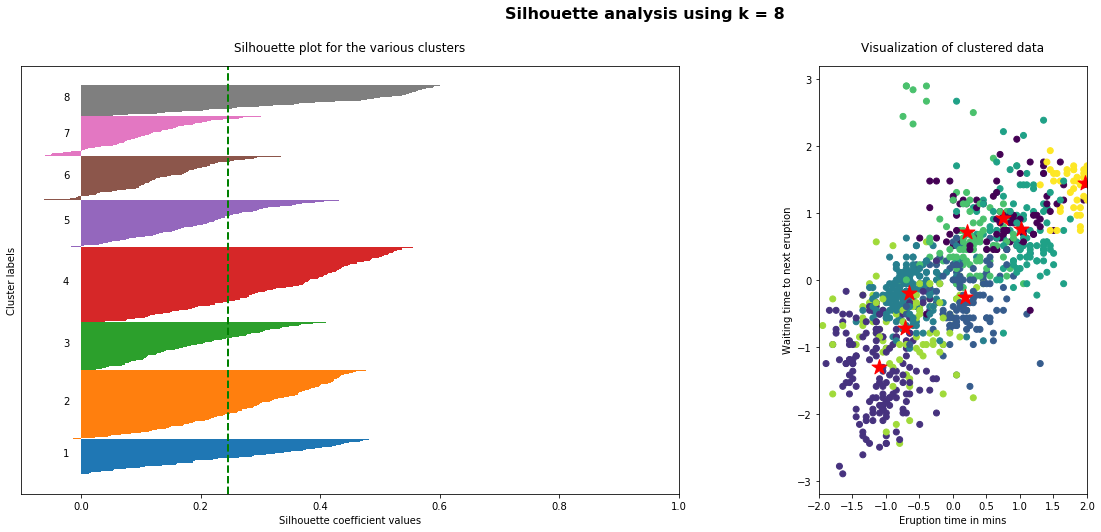

In [25]:
# Verify Silhoutte Score with visualization
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
for i, k in enumerate([4,6,8]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

**As we can see, k=4 has the highest value for silhoutte score, therefore, it is 6 that we use as the number of cluster** 

Sum of intra-cluster distance: 1837.9568869590448
Centroid locations:
[-0.55904924 -0.17016989  0.3545312  -0.26838496 -0.8117491   0.47897802]
[ 0.3460772   0.28295724 -0.152672    0.33189766  0.44569328 -0.41032523]
[ 1.38254168  1.17460726  1.13650102  1.16623523  1.21210923 -1.24048409]
[-1.02397646 -1.15581264 -1.1032804  -1.11263414 -0.75695507  1.06390235]
Cluster membership
1    282
3    229
0    225
2    190
Name: Cluster ID, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


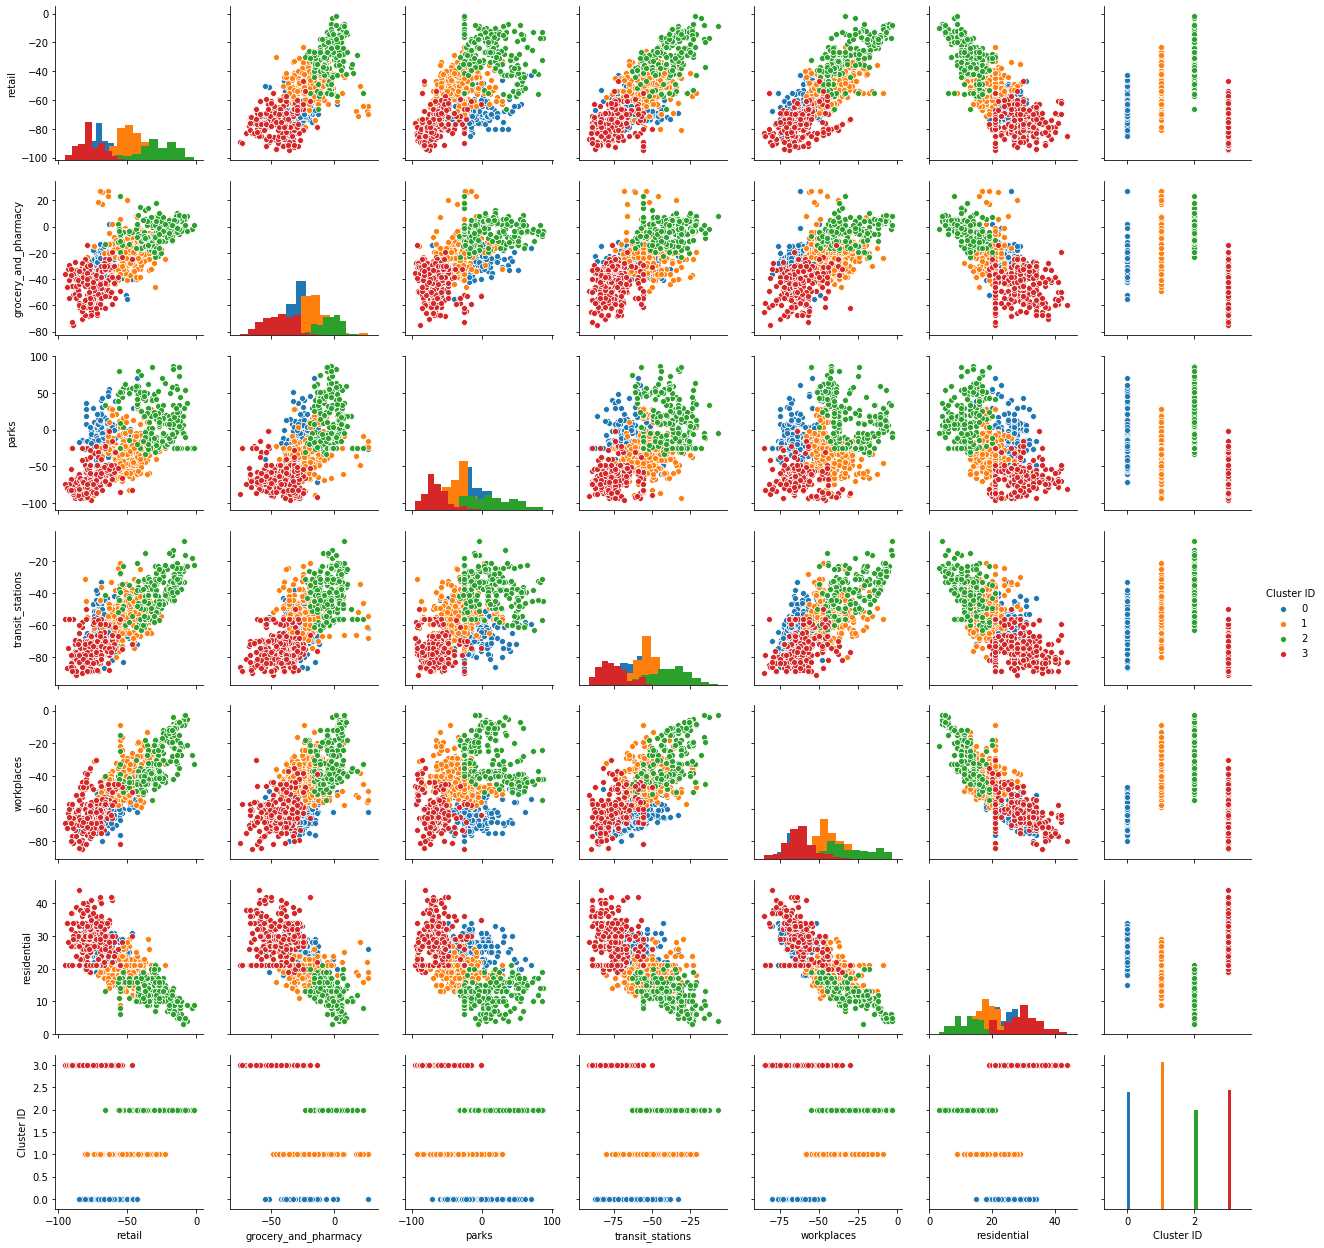

In [27]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
dfr_cleaned['Cluster ID'] = y

# how many in each
print("Cluster membership")
print(dfr_cleaned['Cluster ID'].value_counts())

# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(dfr_cleaned, hue='Cluster ID', diag_kind='hist')
plt.show()

#### Task 4: Build another clustering model using an algorithm that helps to profile the people's mobility only in some countries

In [28]:
df

,country,region,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,United Arab Emirates,Total,-63,-32,-74,-79,-55,34
1,United Arab Emirates,Abu Dhabi,-54,-23,-66,-75,-47,28
2,United Arab Emirates,Ajman,-49,-26,-83,-50,-46,29
3,United Arab Emirates,Dubai,-76,-42,-78,-81,-64,41
4,United Arab Emirates,Fujairah,-46,-22,-43,-56,-30,21
...,...,...,...,...,...,...,...,...
1125,South Africa,North West,-67,-38,-19,-53,-64,32
1126,South Africa,Northern Cape,-63,-33,-23,-72,-59,29
1127,South Africa,Western Cape,-75,-42,-75,-84,-75,37
1128,Zambia,Total,-18,-10,-6,-23,-19,12


In [29]:
df3=df[(df['country']=='Australia') | (df.country == 'Japan')|(df.country == 'United Kingdom')|(df.country == 'Latvia')|(df.country == 'Kenya')|(df.country == 'Romania')|(df.country == 'Slovenia')]
df3=df3.drop('region', axis=1)

In [30]:
df3

,country,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
46,Australia,-39,-8,-27,-60,-41,20
47,Australia,-37,6,-3,-57,-49,22
48,Australia,-40,-6,-26,-60,-43,21
49,Australia,-20,0,-11,-43,-18,13
50,Australia,-34,-5,-23,-58,-38,16
...,...,...,...,...,...,...,...
1048,Slovenia,-72,-41,-25,-55,-51,21
1049,Slovenia,-70,-31,-25,-56,-47,21
1054,Slovenia,-70,-33,-25,-44,-46,21
1072,Slovenia,-55,-36,-25,-44,-44,21


In [31]:
country_map = {'Australia':1, 'United Kingdom': 2, 'Japan': 3, 'Kenya': 4, 'Latvia': 5, 'Romania': 6, 'Slovenia': 7}
df3['country'] = df3['country'].map(country_map)

# convert df to matrix
X = df3.to_numpy()

In [32]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# list to save the clusters and cost
clusters = []
cost_vals = []
rs = 42


# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

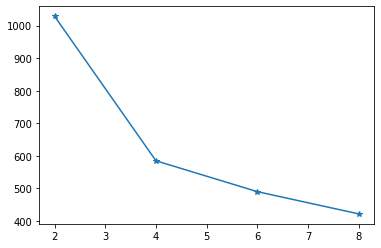

In [34]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [35]:
X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1]] for row in X] # variables of X with categorical datatype
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.23208342117483224
Silscore for categorical variables: 0.007608057071313408
The avg silhouette score for k=4: 0.11984573912307282


In [36]:
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: 0.11984573912307282
The avg Silhouette score for k=6: 0.11639874891443842
The avg Silhouette score for k=8: 0.09154328663554884


In [37]:
Y=dfr_cleaned.to_numpy()
# list to save the clusters and cost
clusters1 = []
inertia_vals1 = []

# this whole process should take a while
for k in range(2, 15, 2):
    # train clustering with the specified K
    modela = KMeans(n_clusters=k, random_state=42, n_jobs=10)
    modela.fit(Y)
    
    # append model to cluster list
    clusters1.append(modela)
    inertia_vals1.append(modela.inertia_)

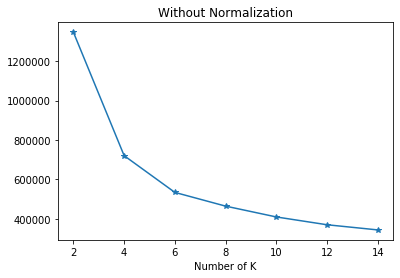

In [38]:
# plot the inertia vs K values
plt.plot(range(2,15,2), inertia_vals1, marker='*')
plt.title('Without Normalization')
plt.xlabel('Number of K')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

print(clusters1[1])
print("Silhouette score for k=4", silhouette_score(Y, clusters1[1].predict(Y)))

print(clusters1[2])
print("Silhouette score for k=6", silhouette_score(Y, clusters1[2].predict(Y)))

print(clusters1[3])
print("Silhouette score for k=8", silhouette_score(Y, clusters1[3].predict(Y)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=4 0.3529726490179055
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=6 0.32192117901827055
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
Silhouette score for k=8 0.28451309610191083


In [40]:
dfr_cleaned.describe()

,retail,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,Cluster ID
count,926.000000,926.000000,926.000000,926.000000,926.00000,926.000000,926.000000
mean,-56.114471,-24.017279,-26.448164,-57.404968,-49.62095,21.399568,1.456803
std,20.014964,17.615771,36.058766,16.219012,16.72622,7.632375,1.109064
min,-95.000000,-75.000000,-96.000000,-91.000000,-85.00000,3.000000,0.000000
25%,-72.000000,-34.000000,-54.000000,-70.000000,-64.00000,16.000000,1.000000
50%,-59.000000,-24.000000,-25.000000,-57.000000,-51.00000,21.000000,1.000000
75%,-42.000000,-12.250000,-6.250000,-47.000000,-39.00000,27.000000,2.000000
max,-2.000000,27.000000,87.000000,-7.000000,-3.00000,44.000000,3.000000


In [41]:
scaler = StandardScaler()
Z = scaler.fit_transform(dfr_cleaned)
z= pd.DataFrame(Z)
z.describe()

,0,1,2,3,4,5,6
count,9.260000e+02,9.260000e+02,9.260000e+02,9.260000e+02,9.260000e+02,9.260000e+02,9.260000e+02
mean,2.399688e-16,1.064663e-16,1.649748e-16,3.505715e-16,3.704740e-17,2.834306e-16,-1.237311e-16
std,1.000540e+00,1.000540e+00,1.000540e+00,1.000540e+00,1.000540e+00,1.000540e+00,1.000540e+00
min,-1.943873e+00,-2.895716e+00,-1.929889e+00,-2.072456e+00,-2.116328e+00,-2.412029e+00,-1.314252e+00
25%,-7.941115e-01,-5.669985e-01,-7.644944e-01,-7.769794e-01,-8.601358e-01,-7.078381e-01,-4.121044e-01
50%,-1.442465e-01,9.813908e-04,4.018293e-02,2.498219e-02,-8.249293e-02,-5.238002e-02,-4.121044e-01
75%,7.055770e-01,6.683578e-01,5.604484e-01,6.418757e-01,6.353312e-01,7.341697e-01,4.900437e-01
max,2.705162e+00,2.897679e+00,3.147902e+00,3.109450e+00,2.788804e+00,2.962727e+00,1.392192e+00


Cluster membership
3    92
0    67
2    66
1    50
Name: Cluster_ID, dtype: int64


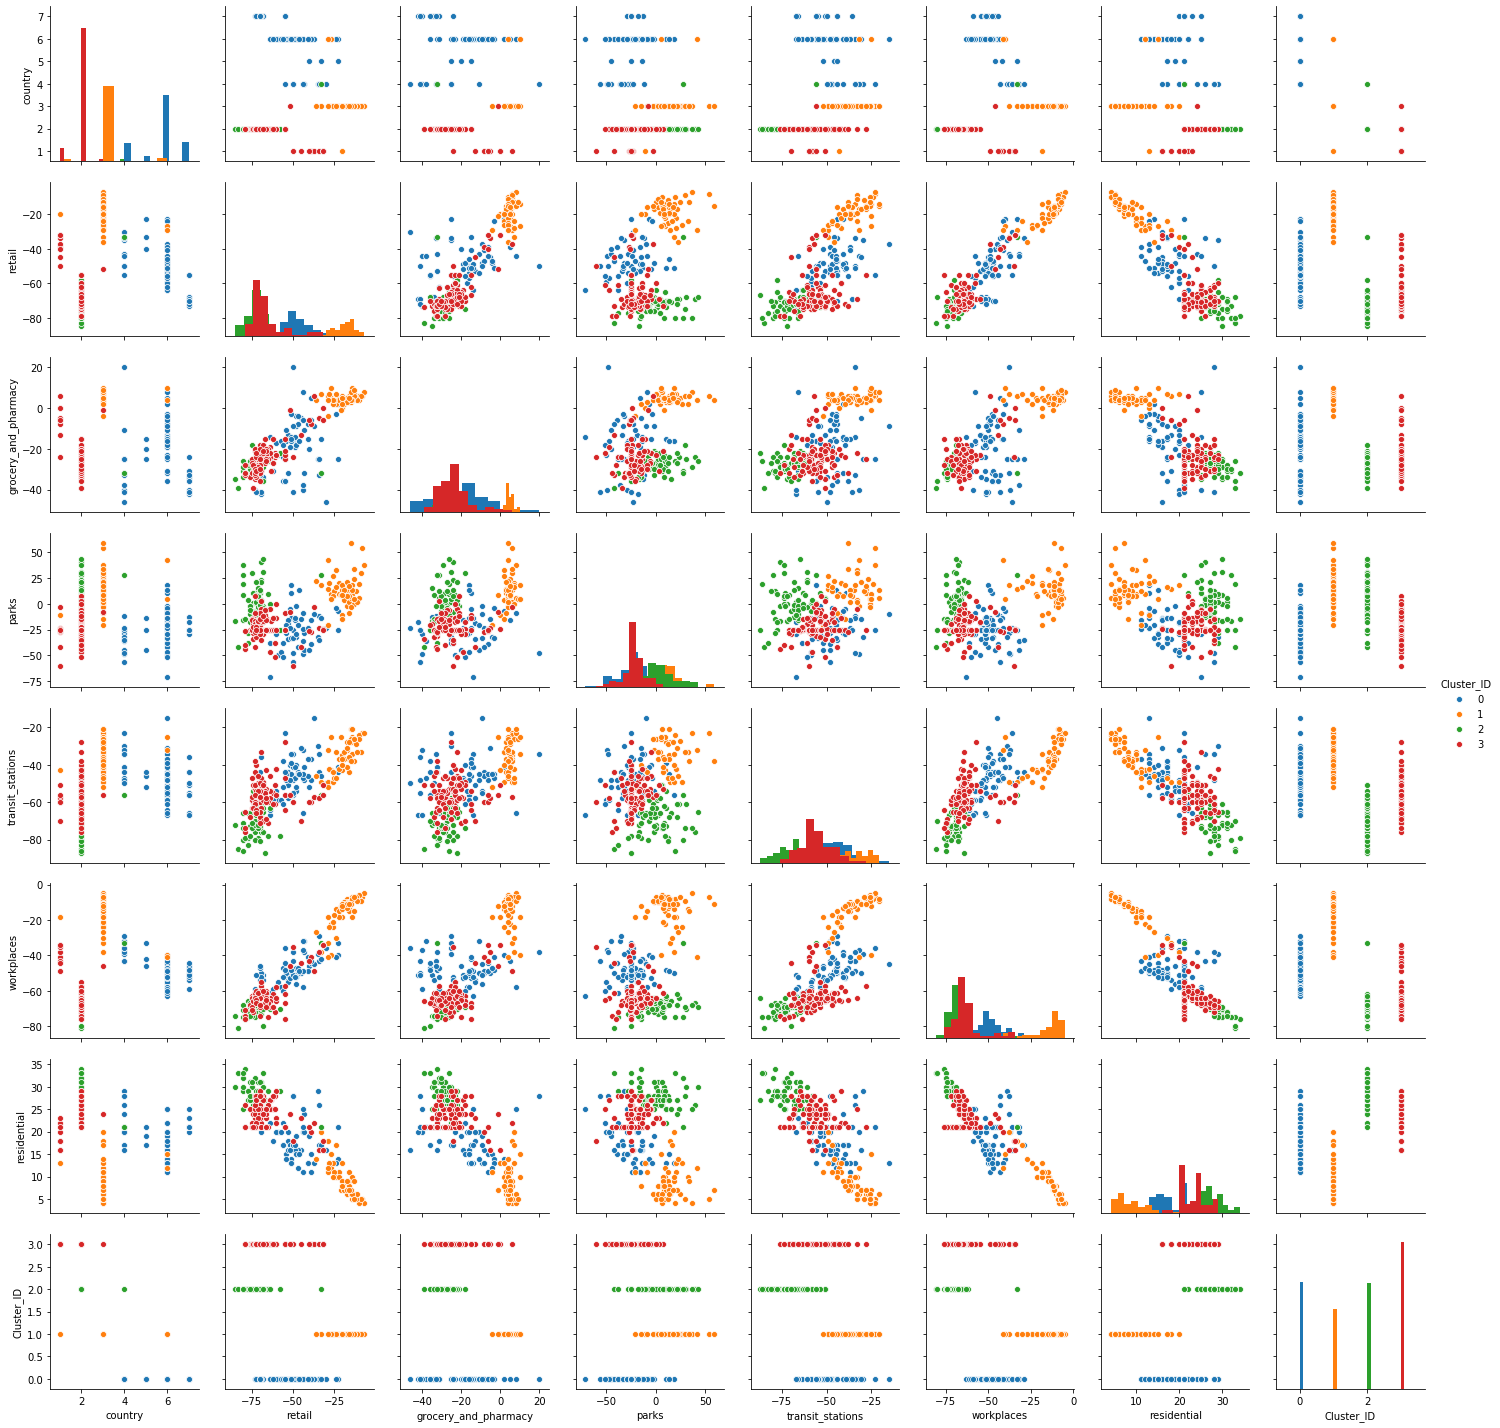

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]
y=model.fit_predict(X, categorical=[1]) 
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID',diag_kind='hist')
plt.show()

In [43]:
from tabulate import tabulate
display(tabulate(df3.info()))

ModuleNotFoundError: No module named 'tabulate'